<a href="https://colab.research.google.com/github/deecodess/CIFAR-10/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing torchvision

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Loading the Training and Testing Data

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size=4

X_train = torchvision.datasets.CIFAR10(root='./data',train=True,
                                         download=True,transform=transform)
y_train = torch.utils.data.DataLoader(X_train, batch_size=batch_size,
                                         shuffle=True,num_workers=2)
X_test =torchvision.datasets.CIFAR10(root='./data',train=False,download=True,
                                     transform=transform)
y_test=torch.utils.data.DataLoader(X_test,batch_size=batch_size,
                                       shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer',
         'dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


Defining a CNN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)  #flattens all dimensions except batch
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x;

net=Net()


Loss Function and Optimiser

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001, momentum=0.9)


Train the network

In [ ]:
for epoch in range(2):
  running_loss=0.0
  for i, data in enumerate(y_train,0):
    #get inputs;data is a list of [inputs,labels]
    inputs, labels=data

    #zero the parameter gradients
    optimizer.zero_grad()

    #forward+backward+optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    #print statistics
    running_loss += loss.item()
    if i %2000==1999:  #print every 2000 mini-batches
      print(f'[{epoch + 1},{i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')



[1, 2000] loss: 2.189
[1, 4000] loss: 1.885
[1, 6000] loss: 1.709
[1, 8000] loss: 1.600
[1,10000] loss: 1.548
[1,12000] loss: 1.480
[2, 2000] loss: 1.410
[2, 4000] loss: 1.364
[2, 6000] loss: 1.363
[2, 8000] loss: 1.355
[2,10000] loss: 1.314
[2,12000] loss: 1.297
Finished Training


Saving Model(No Need as Such)

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(),PATH)

Testing network on test data

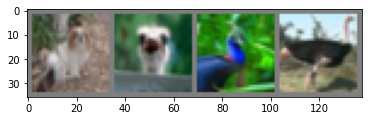

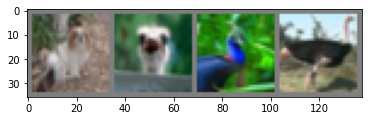

GroundTruth:  dog   bird  bird  bird 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  img=img/2 +0.5  #unnormalize doubt!!!!!!!!!
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

# random training images
dataiter= iter(y_train)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))


#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Loading back model(Saving and Loading not necessary at all)

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Acc to NN, what these examples are:

In [ ]:
outputs = net(images)

Predicting output through energies
(The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class)

How the network performs on the whole dataset

In [ ]:
correct = 0
total = 0
#when we are not training, then there is no need to calculate gradients for inputs
with torch.no_grad():
  for data in y_test:
    images, labels = data
    #calculate outputs by running images through the network
    outputs=net(images)
    #the class with the highest energy will get chosed as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 75 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 68 %
Accuracy of the network on the 10000 test images: 70 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 58 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy o

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in y_test:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 53.8 %
Accuracy for class: car   is 69.6 %
Accuracy for class: bird  is 51.7 %
Accuracy for class: cat   is 25.4 %
Accuracy for class: deer  is 25.2 %
Accuracy for class: dog   is 56.8 %
Accuracy for class: frog  is 67.8 %
Accuracy for class: horse is 69.5 %
Accuracy for class: ship  is 72.6 %
Accuracy for class: truck is 51.7 %


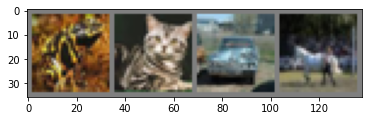

frog  cat   car   horse
Predicted:  dog   dog   car   horse


In [ ]:


# show an image
def imshow(img):
  img=img/2 +0.5  #unnormalize doubt!!!!!!!!!
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

# random training images
dataiter= iter(y_train)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}'for j in range(batch_size)))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))